In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.eda.auto as auto
from sklearn.model_selection import train_test_split



In [35]:


def show_duplicates(df, column='id'):
    """
    Display duplicate records side by side for easy comparison.

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    column (str): Column name to check for duplicates (default: 'id')

    Returns:
    pandas.DataFrame: DataFrame containing only the duplicate records, reset and sorted
    """
    # Find duplicate values
    duplicates = df[df[column].duplicated(keep=False)]

    if len(duplicates) == 0:
        print(f"No duplicates found in column '{column}'")
        return pd.DataFrame()

    # Sort by the duplicate column to group duplicates together
    duplicates_sorted = duplicates.sort_values(by=column).reset_index(drop=True)

    # Print summary
    duplicate_count = len(duplicates_sorted[column].unique())
    total_dupes = len(duplicates_sorted)
    print(f"Found {duplicate_count} values with duplicates")
    print(f"Total of {total_dupes} rows affected\n")

    return duplicates_sorted

In [72]:
df = pd.read_csv('tracks_audio_features_with_names.csv')
df = df.drop(columns=['analysis_url', 'track_href', 'uri', 'type'])

# Small clean

## Drop duplicates

In [73]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

In [74]:
duplicates = show_duplicates(df, 'id')

No duplicates found in column 'id'


# Train and Test Splits

In [48]:
target_col = 'like'

In [49]:
df_train, df_test = train_test_split(df, stratify=df['like'], test_size=0.15, random_state=42)

In [4]:
df_train['like'].value_counts(normalize=True)

,like
0,0.503884
1,0.496116


In [5]:
df_test['like'].value_counts(normalize=True)

,like
0,0.502868
1,0.497132


# EDA

**`train_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
acousticness,2961,1639,,,0.251944,0.275507,0.000002,0.0272,0.135,0.413,0.992,float64,,,float,numeric,
danceability,2961,677,,,0.62114,0.162972,0.0665,0.51,0.635,0.752,0.973,float64,,,float,numeric,
duration_ms,2961,2769,,,226927.305302,81717.570644,46227.0,182307.0,215012.0,255467.0,1465973.0,int64,,,int,numeric,
energy,2961,781,,,0.654902,0.202431,0.00379,0.52,0.69,0.811,0.997,float64,,,float,numeric,
id,2961,2914,6WrI0LAC5M1Rw2MnX2ZvEg,3,,,,,,,,object,,,object,category,
instrumentalness,2961,1565,,,0.082286,0.21165,0.0,0.0,0.00005,0.01,0.961,float64,,,float,numeric,
key,2961,12,,,5.355623,3.565911,0.0,2.0,6.0,9.0,11.0,int64,,,int,category,
like,2961,2,,,0.496116,0.500069,0.0,0.0,0.0,1.0,1.0,int64,,,int,category,
liveness,2961,905,,,0.190017,0.158299,0.0191,0.0959,0.126,0.237,0.986,float64,,,float,numeric,
loudness,2961,2482,,,-7.170191,3.378112,-31.414,-8.692,-6.487,-4.828,0.811,float64,,,float,numeric,


**`test_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
acousticness,523,451,,,0.266227,0.277928,0.000005,0.0307,0.16,0.454,0.992,float64,,,float,numeric,
danceability,523,341,,,0.620237,0.161248,0.154,0.5015,0.636,0.74,0.937,float64,,,float,numeric,
duration_ms,523,518,,,226305.950287,87146.11556,58507.0,180337.0,214373.0,248615.5,1081316.0,int64,,,int,numeric,
energy,523,383,,,0.643295,0.209263,0.0387,0.51,0.681,0.8085,0.989,float64,,,float,numeric,
id,523,522,2LEF1A8DOZ9wRYikWgVlZ8,2,,,,,,,,object,,,object,category,
instrumentalness,523,338,,,0.08941,0.220356,0.0,0.0,0.00007,0.01105,0.954,float64,,,float,numeric,
key,523,12,,,5.435946,3.47476,0.0,2.0,6.0,8.0,11.0,int64,,,int,category,
like,523,2,,,0.497132,0.50047,0.0,0.0,0.0,1.0,1.0,int64,,,int,category,
liveness,523,345,,,0.198209,0.17155,0.0322,0.09735,0.126,0.2545,0.978,float64,,,float,numeric,
loudness,523,509,,,-7.298685,3.245288,-22.162,-8.804,-6.467,-5.0005,-1.247,float64,,,float,numeric,


### Feature Distance

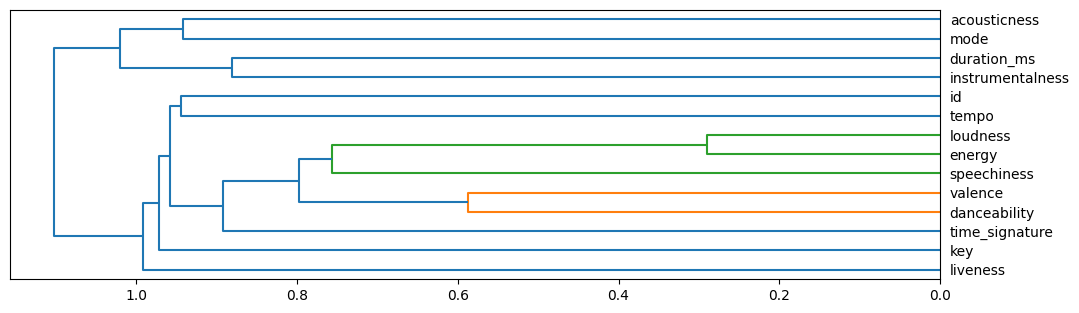

In [6]:
auto.dataset_overview(train_data=df_train, test_data=df_test, label=target_col)

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
like,2961,0.496116,0.500069,0.0,0.0,0.0,1.0,1.0,int64,2,,,int,


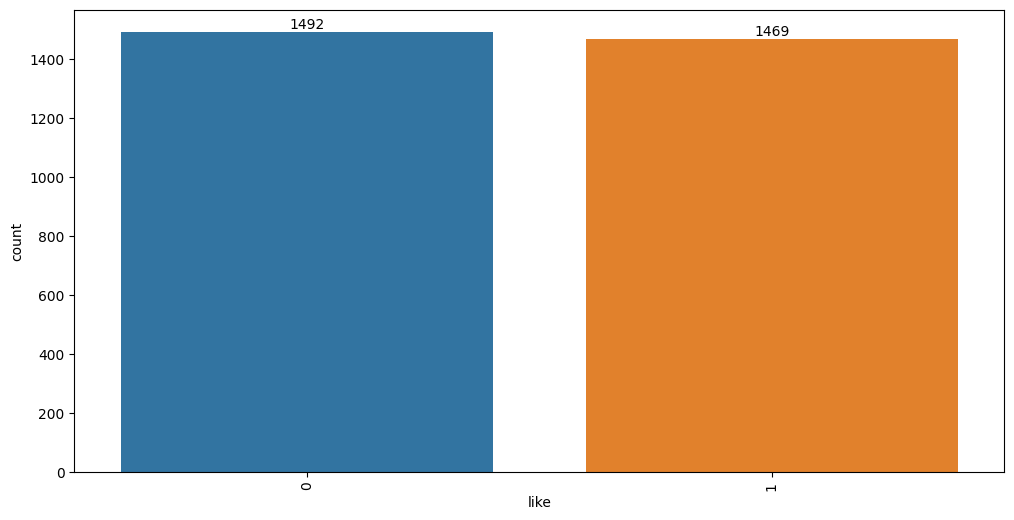

### Target variable correlations
 - ⚠️ no fields with absolute correlation greater than `0.5` found for target variable `like`.

In [7]:
auto.target_analysis(train_data=df_train, label=target_col)

No path specified. Models will be saved in: "AutogluonModels/ag-20241024_224502/"


### Model Prediction for like

Using validation data for `Test` points

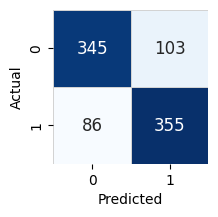

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.787402,0.819277,0.00717,0.007602,0.709647,0.00717,0.007602,0.709647,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
instrumentalness,0.085264,0.003221,2.439530e-07,5,0.091897,0.078632
danceability,0.069066,0.008950,3.308678e-05,5,0.087494,0.050639
loudness,0.032396,0.008357,4.874193e-04,5,0.049604,0.015188
speechiness,0.020472,0.007687,1.995272e-03,5,0.036300,0.004645
acousticness,0.012823,0.005931,4.216295e-03,5,0.025035,0.000612
valence,0.009899,0.003412,1.455405e-03,5,0.016924,0.002874
energy,0.007424,0.004179,8.250477e-03,5,0.016028,-0.001180
liveness,0.005849,0.000941,7.771776e-05,5,0.007787,0.003911
tempo,0.002025,0.001467,1.834099e-02,5,0.005045,-0.000995
duration_ms,0.000450,0.001006,1.869505e-01,5,0.002522,-0.001622


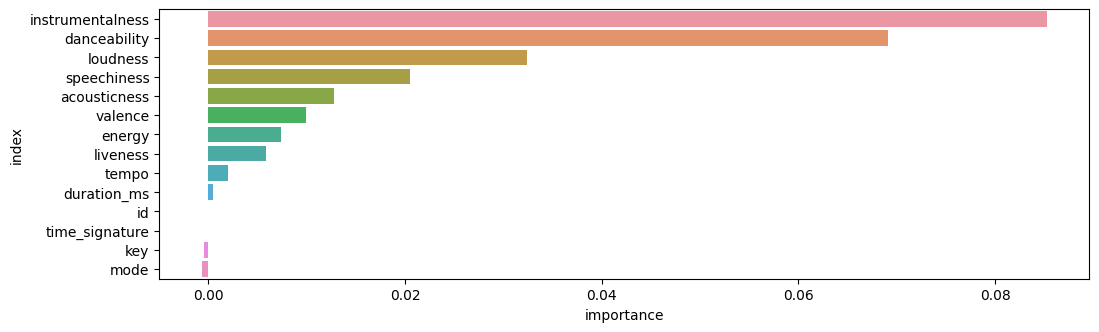

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,like,0,1,error
2136,0.328,0.130,6,-15.094,1,0.0307,0.892000,0.012900,0.1220,0.1690,78.454,6JgHKt0WwdwlXIht6M0mqa,118933,4,0,0.153524,0.846476,0.692952
2092,0.141,0.622,6,-10.138,1,0.0444,0.000694,0.886000,0.4870,0.0577,75.812,2nfuI6shaiNMhtgCiSouAl,114067,4,0,0.174726,0.825274,0.650549
3200,0.469,0.206,5,-16.873,1,0.0333,0.834000,0.001170,0.2090,0.3890,99.010,1kEWmwBPNkG1LtMb1H0xtZ,136707,4,0,0.176802,0.823198,0.646396
881,0.808,0.721,2,-4.110,0,0.0317,0.199000,0.000000,0.2410,0.6160,99.961,5fCcV4MkmuRyBDzy8rCNUy,197643,4,1,0.816593,0.183407,0.633186
2074,0.274,0.726,9,-11.541,1,0.0449,0.000212,0.011300,0.0993,0.4260,146.449,4vJr55lngvhSM8WIh9CjQc,422933,4,0,0.186488,0.813512,0.627023
55,0.829,0.792,2,-3.755,0,0.0668,0.726000,0.000006,0.1220,0.7580,118.050,0tZkVZ9DeAa0MNK2gY5NtV,215507,4,1,0.812553,0.187447,0.625106
2904,0.534,0.409,7,-9.559,1,0.0378,0.844000,0.000656,0.1150,0.2430,127.357,1olWQ1LOUYs4VBwx5N8Lz9,225827,4,0,0.200101,0.799899,0.599797
2151,0.367,0.634,5,-6.475,1,0.0270,0.000824,0.075900,0.1160,0.0964,89.981,1EryAkZ0VHstC6haIxVBiE,241533,4,0,0.203255,0.796745,0.593490
2156,0.333,0.445,3,-16.343,0,0.0283,0.008580,0.045100,0.1670,0.3500,89.371,3HzWxmvpQU3QHQ59zw1X4V,417840,4,0,0.203740,0.796260,0.592520
2124,0.294,0.745,5,-9.138,1,0.0461,0.050000,0.125000,0.6760,0.3470,134.364,5Z8EDau8uNcP1E8JvmfkZe,210107,4,0,0.212782,0.787218,0.574437


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,like,0,1,error
103,0.654,0.828,1,-5.377,0,0.0281,0.001460,0.000144,0.1220,0.790,112.056,2x8evxqUlF0eRabbW2JBJd,183893,4,1,0.500221,0.499779,0.000441
2727,0.510,0.691,9,-5.199,0,0.0449,0.032100,0.000000,0.1510,0.372,129.852,1P7hMSbpJOQy58eC78qx7s,151703,4,0,0.499317,0.500683,0.001366
2945,0.567,0.333,0,-8.818,1,0.0258,0.714000,0.000005,0.2500,0.208,139.807,6ZEVQ2whiJvhjCNAOJ0DC3,214133,4,0,0.499254,0.500746,0.001493
2077,0.444,0.922,11,-4.519,0,0.0529,0.006350,0.000000,0.3050,0.301,140.206,7sicPw7V9SYJl3Zjme9i4p,225533,4,0,0.498689,0.501311,0.002621
2095,0.329,0.954,8,-7.006,0,0.0722,0.000004,0.000614,0.0510,0.627,156.899,6rkeaQRCWZxwkjhyqgxjXi,237347,4,0,0.496593,0.503407,0.006814
937,0.411,0.408,7,-6.721,1,0.0946,0.825000,0.000000,0.1270,0.247,77.423,421W0Nxl3Z6h5M2jMnFQUk,268480,4,1,0.504186,0.495814,0.008372
1169,0.677,0.373,1,-14.525,0,0.1490,0.299000,0.000003,0.3640,0.497,155.935,3ibni3TQ1M9S8tciqbXU4I,187030,3,1,0.505479,0.494521,0.010957
162,0.645,0.938,11,-4.557,0,0.0391,0.094600,0.022600,0.1590,0.495,140.886,3td69vL9Py7Ai9wfXYnvji,263880,4,1,0.505837,0.494163,0.011674
958,0.508,0.623,0,-6.919,1,0.0564,0.033600,0.000000,0.2080,0.785,173.778,7kIwVGX93RF6c8ZLKpeiNN,217693,4,1,0.505844,0.494156,0.011689
2984,0.509,0.562,5,-7.860,1,0.0603,0.588000,0.000000,0.0978,0.465,75.905,0gjhhuqKxswtR1KzYSpSfd,225267,4,0,0.493466,0.506534,0.013067


In [8]:
state = auto.quick_fit(
    df_train,
    target_col,
    return_state=True,
    show_feature_importance_barplots=True
)

# Final Checks

In [64]:
same_rows = df_train[df_train['id'].isin(df_test['id'])].sum()
same_rows

,0
danceability,0.0
energy,0.0
key,0.0
loudness,0.0
mode,0.0
speechiness,0.0
acousticness,0.0
instrumentalness,0.0
liveness,0.0
valence,0.0


In [65]:
predictor = TabularPredictor(label=target_col).fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20241024_232540/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20241024_232540/"
AutoGluon Version:  0.8.3
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Disk Space Avail:   75.98 GB / 120.94 GB (62.8%)
Train Data Rows:    2907
Train Data Columns: 15
Label Column: like
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Availabl

In [69]:
predictor.leaderboard(df_test)

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      RandomForestGini    0.855750      0.844        0.224336       0.077978  1.711660                 0.224336                0.077978           1.711660            1       True          5
1            LightGBMXT    0.853801      0.874        0.228795       0.031964  1.199521                 0.228795                0.031964           1.199521            1       True          3
2   WeightedEnsemble_L2    0.853801      0.874        0.231387       0.034423  2.269441                 0.002592                0.002459           1.069920            2       True         13
3      RandomForestEntr    0.849903      0.834        0.314752       0.121377  3.275264                 0.314752                0.121377           3.275264            1       True          6
4         LightGBMLarge    0.846004      0.84

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.855750,0.844,0.224336,0.077978,1.711660,0.224336,0.077978,1.711660,1,True,5
1,LightGBMXT,0.853801,0.874,0.228795,0.031964,1.199521,0.228795,0.031964,1.199521,1,True,3
2,WeightedEnsemble_L2,0.853801,0.874,0.231387,0.034423,2.269441,0.002592,0.002459,1.069920,2,True,13
3,RandomForestEntr,0.849903,0.834,0.314752,0.121377,3.275264,0.314752,0.121377,3.275264,1,True,6
4,LightGBMLarge,0.846004,0.840,0.147499,0.017137,3.811915,0.147499,0.017137,3.811915,1,True,12
5,LightGBM,0.844055,0.860,0.086116,0.010962,0.894785,0.086116,0.010962,0.894785,1,True,4
6,CatBoost,0.842105,0.864,0.021208,0.007750,5.396812,0.021208,0.007750,5.396812,1,True,7
7,ExtraTreesGini,0.830409,0.830,0.262673,0.088521,0.897722,0.262673,0.088521,0.897722,1,True,8
8,ExtraTreesEntr,0.826511,0.824,0.343782,0.077884,0.970778,0.343782,0.077884,0.970778,1,True,9
9,NeuralNetTorch,0.812865,0.812,0.077950,0.034080,5.035836,0.077950,0.034080,5.035836,1,True,11


In [71]:

predictor.evaluate(df_test, silent=True)

{'accuracy': 0.8538011695906432,
 'balanced_accuracy': 0.8536922749521174,
 'mcc': 0.7076535235597053,
 'roc_auc': 0.9152555254917458,
 'f1': 0.8565965583173997,
 'precision': 0.8484848484848485,
 'recall': 0.8648648648648649}

In [56]:
predictor.feature_importance(df_train)

These features in provided data are not utilized by the predictor and will be ignored: ['id']
Computing feature importance via permutation shuffling for 14 features using 2907 rows with 5 shuffle sets...
	84.97s	= Expected runtime (16.99s per shuffle set)
	19.47s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
track_name,0.130100,0.003603,7.051223e-08,5,0.137518,0.122681
danceability,0.112625,0.003376,9.673844e-08,5,0.119575,0.105674
instrumentalness,0.103956,0.003231,1.117845e-07,5,0.110608,0.097304
speechiness,0.032542,0.005355,8.488009e-05,5,0.043567,0.021517
valence,0.031854,0.001862,1.394750e-06,5,0.035688,0.028020
acousticness,0.029584,0.002878,1.061507e-05,5,0.035510,0.023658
loudness,0.025800,0.001976,4.098024e-06,5,0.029869,0.021731
energy,0.022085,0.002830,3.167864e-05,5,0.027912,0.016257
tempo,0.013003,0.001692,3.365894e-05,5,0.016487,0.009519
duration_ms,0.012246,0.001389,1.951396e-05,5,0.015106,0.009387
